Use famous iris flower dataset from sklearn.datasets to predict flower species using random forest classifier.

    Measure prediction score using default n_estimators (10)
    Now fine tune your model by changing number of trees in your classifer and tell me what best score you can get using how many trees



In [2]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [5]:
df = pd.DataFrame(iris.data, columns= iris.feature_names)
target = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(df, target, test_size=0.2)

In [27]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)
model.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [28]:
model.score(Xtest, ytest)

0.9666666666666667

In [31]:
ypredicted = model.predict(Xtest)

In [24]:
testn = []
for x in range(1,20):
    model = RandomForestClassifier(n_estimators=x)
    model.fit(Xtrain, ytrain)
    testn.append(model.score(Xtest, ytest))
    
testn

[0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 0.9666666666666667,
 1.0,
 0.9666666666666667,
 1.0]

In [33]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytest, ypredicted)
CM

array([[ 7,  0,  0],
       [ 0, 12,  0],
       [ 0,  1, 10]], dtype=int64)

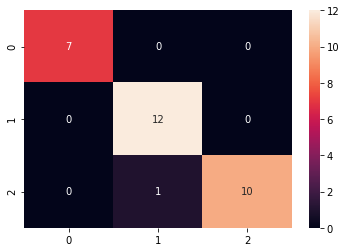

In [35]:
import seaborn as sb
%matplotlib inline
sb.heatmap(CM, annot=True)